In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from mpl_stylesheet import statPlots, wge_presentation, wge_colors_2by5

In [2]:
wge_presentation()

In [3]:
def plot_posPrior(ifile, save_fn = '', 
                  doublestrand = True,
                  xticklabels = (0,100, 200), 
                  yticklabels = (0,0.008, 0.016)):
    colors = ["#FCB711", "#0DB14B", "#F37021",  "#0089D0", "#CC004C", "#6460AA"] 
    
    positions = pd.read_csv(ifile, header=None).values.tolist()
    if doublestrand:
        width = int(len(positions) / 2)
        pospositions = positions[:width]
        negpositions = positions[width:]
        negpositions.reverse()

        #fig = plt.figure(figsize=(12, 8), dpi=160)
        fig = plt.figure()
        ax = fig.add_subplot(111)    # The big subplot
        ax1 = fig.add_subplot(211)
        ax2 = fig.add_subplot(212)
        posstrand = ax1.plot(range(0, width), pospositions, c=colors[0] )
        negstrand = ax2.plot(range(0, width), negpositions, c=colors[1] )
        ax2.invert_yaxis()
    
        plt.subplots_adjust(hspace=.0)

        ax1.set_ylim((0,yticklabels[-1]))
        ax1.set_yticks(yticklabels)
        ax1.set_yticklabels(yticklabels, rotation=90, va="center" )
        ax1.tick_params(labelbottom=False)  
       
        ax2.set_ylim((yticklabels[-1],0))
        ax2.set_yticks(yticklabels)
        ax2.set_yticklabels(yticklabels, rotation=90, va="center" )
        
        ax2.set_xticks(xticklabels)
        ax2.set_xticklabels(xticklabels)
        
        ax1.text(0.8*xticklabels[-1],0.7*yticklabels[-1],"$+$")
        ax2.text(0.8*xticklabels[-1],0.7*yticklabels[-1],"$-$")
        
        # Turn off axis lines and ticks of the big subplot
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
       
        ax.set_xlabel("sequence positions")
        ax.set_ylabel("positional prior")
        
        fig.show()
        if save_fn:
            fig.savefig(save_fn, bbox_inches='tight') 

    else:
        fig = plt.figure(figsize=(12, 8), dpi=160)
        width = len(positions)
        axes = plt.gca()
        pospositions = positions
        posstrand = plt.plot(range(0, width), pospositions, c=colors[0] )

        plt.title("optimized pi over the sequence positions\n", fontsize=30)
        plt.xlabel("position i on the sequence", fontsize=30)
        plt.ylabel("pi[i]", fontsize=30)
        plt.tick_params(labelsize=25)
        plt.axhline(y=0, linestyle='--', c="grey")
        plt.xlim(0, width)
        plt.show()

In [4]:
idir_gtrd = "../../data/processed/GTRD/"
idir_encode = "../../data/processed/ENCODE/posPrior/"
odir_figure = "../../figures/"

sfx_time = ".time.bench"
sfx_score = ".bmscore.bench"
sfx_length = ".length.bench"

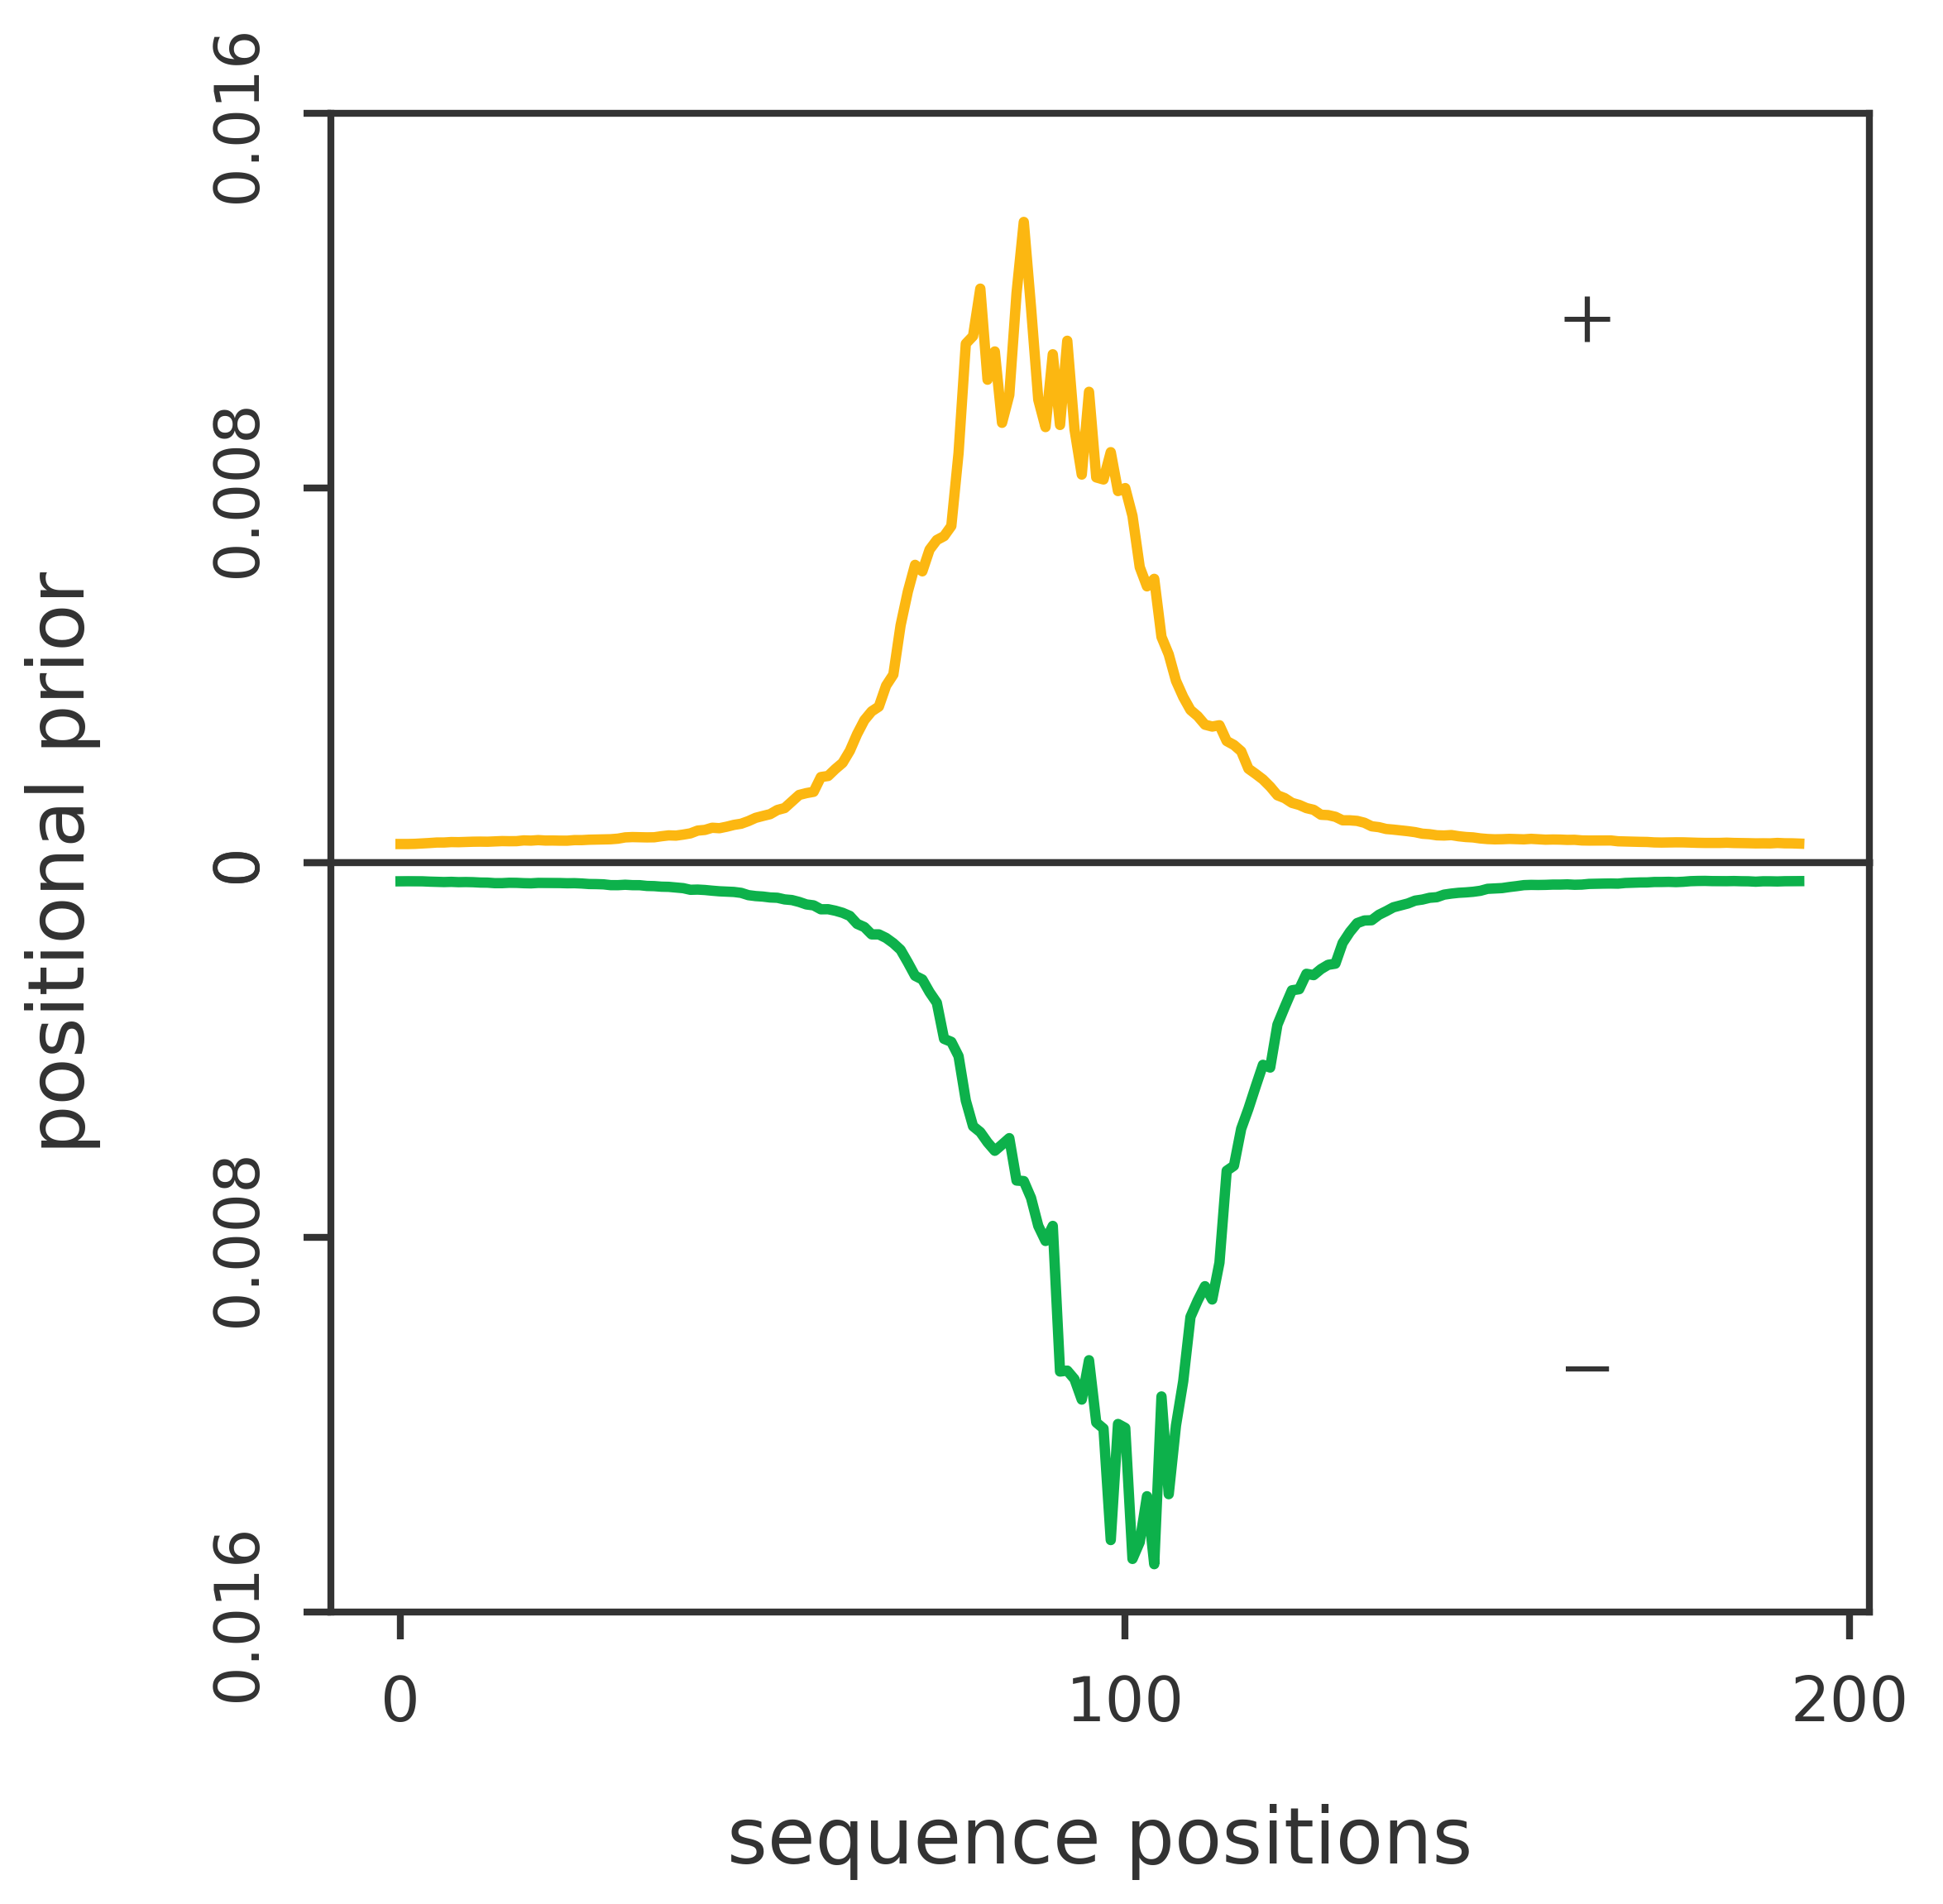

In [5]:
ifile = idir_gtrd + "example/GTRD_GABPa.pi"
save_fn = odir_figure + 'posPrior_GABPa_GTRD.pdf'
plot_posPrior(ifile, save_fn, doublestrand = True)

There are 8 tools. Each has 435(435) data sets.


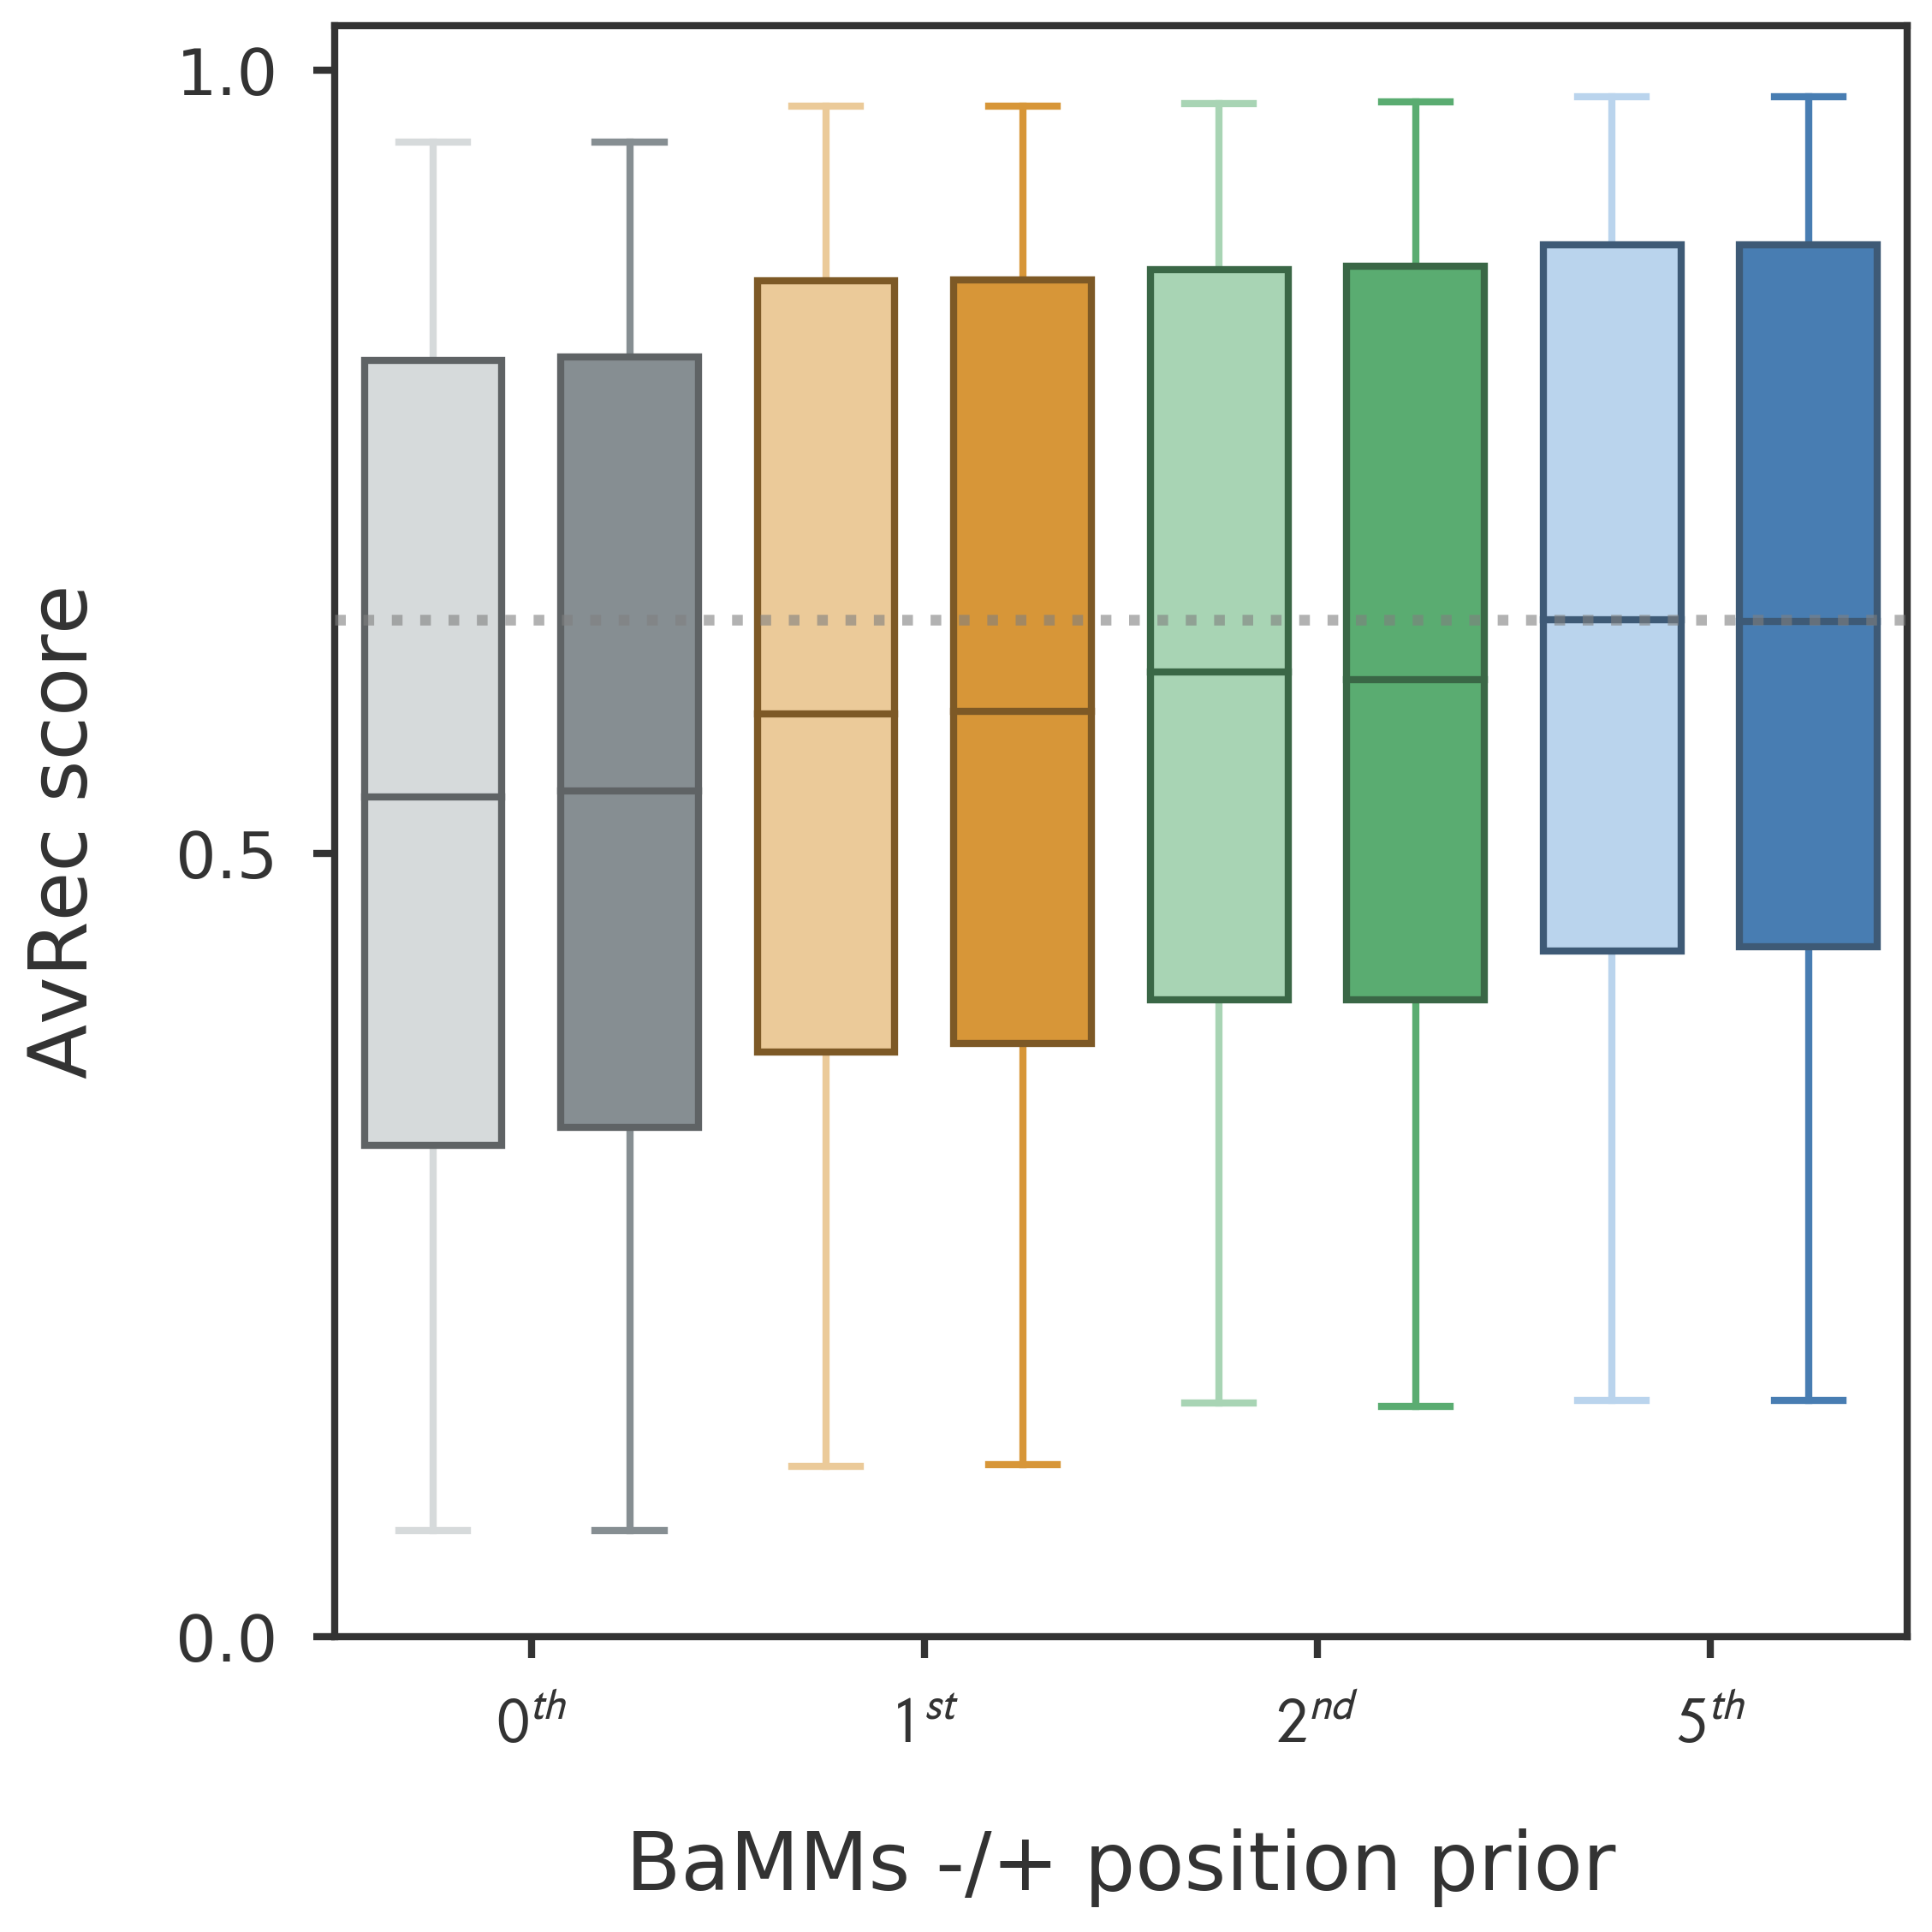

In [6]:
datasets = [
    "bamm_k0_seedSites",
    "bamm_k0_optiPos",
    
    "bamm_k1_seedSites",
    "bamm_k1_optiPos",
    
    "bamm_k2_seedSites",
    "bamm_k2_optiPos",

    "bamm_k5_seedSites",
    "bamm_k5_optiPos",
]

labels = [
    "$0^{th}$ order",
    "$0^{th}$ order, z",
    
    "$1^{st}$ order",
    "$1^{st}$ order, z",
    
    "$2^{nd}$ order",
    "$2^{nd}$ order, z",

    "$5^{th}$ order",
    "$5^{th}$ order, z",
]

scores = []
times = []
for data in datasets:
    scores.append(idir_encode+data+sfx_score)
    times.append(idir_encode+data+sfx_time)
    
args =  {
         "scores" : scores,
         "labels" : labels,
         "pstyle" : 'box',
         "nolegend": True,
         "nosticks": True,
         "ncluster": 4,
         "nameclus": ["$0^{th}$", "$1^{st}$", "$2^{nd}$", "$5^{th}$"],
         "ytick"  : (0.0,0.5,1.0),
         "colors" : wge_colors_2by5(),
         "median_colors" : wge_colors_2by5( deeper=True ),
         "xlabel" : 'BaMMs -/+ position prior',
         "ylabel" : 'AvRec score',
         "save_fn": odir_figure + 'cv_encode_posPrior_boxplot.pdf',
}
statPlots(args)

There are 8 tools. Each has 435(435) data sets.


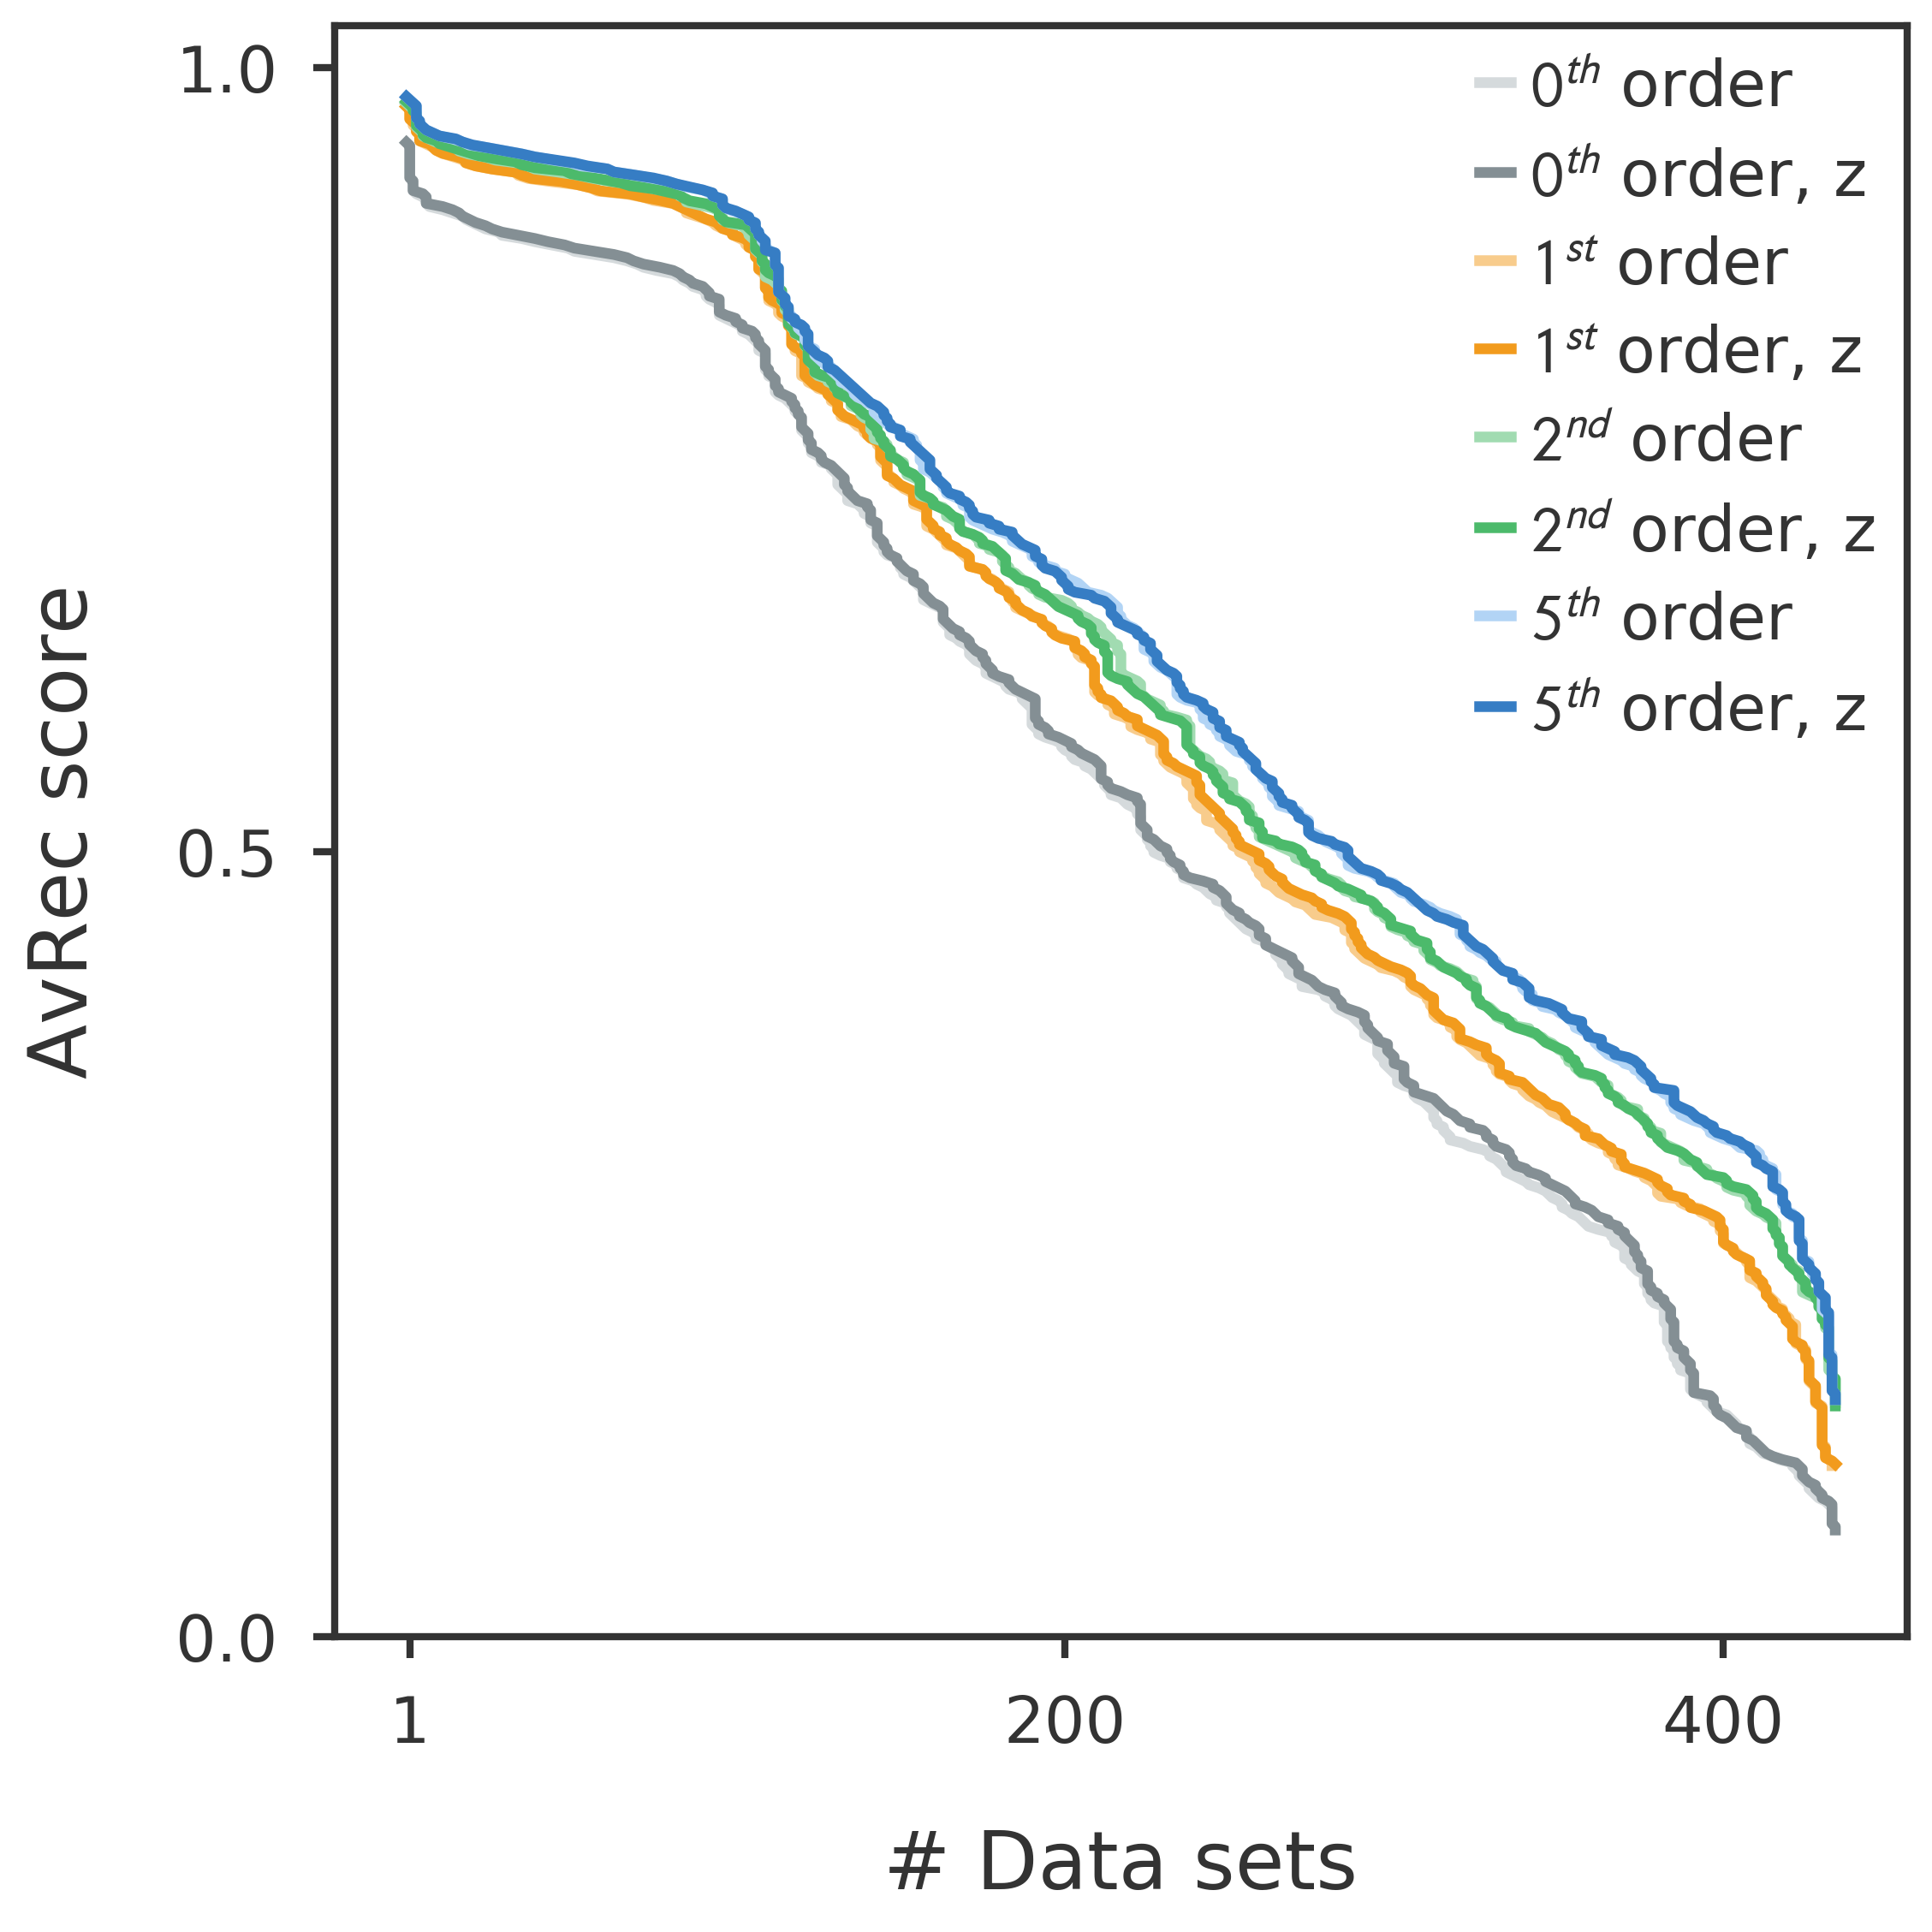

In [7]:
args =  {
         "scores" : scores,
         "labels" : labels,
         "pstyle" : 'cumu',
         "legend" : True,
         "ytick"  : (0.0,0.5,1.0),
         "colors" : wge_colors_2by5(),
         "median_colors" : wge_colors_2by5(deeper=True),
         "xlabel" : '# Data sets',
         "ylabel" : 'AvRec score',
         "save_fn": odir_figure + 'cv_encode_posPrior_cumuplot.pdf',
}
statPlots(args)